# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import math

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here # 
    number_Datapoints= len(Data_points)
    number_Of_features= len(Data_points[0])
    k= len(Cluster_Centroids)
    Cluster_Distance= np.zeros((number_Datapoints,k))
    if Distance_Type == "E":
        for i in range(0,k):
            for j in range(0,number_Datapoints):
                Temp_Distance=0
                for q in range(0,number_Of_features):
                    temp=Cluster_Centroids[i][q]-Data_points[j][q]
                    Temp_Distance+= temp**2
                Temp_Distance= math.sqrt(Temp_Distance)
                Cluster_Distance[j][i]=Temp_Distance
    return Cluster_Distance

Cluster_Centroids=[[1,1],[2,1]]
Data_points=[[1,1],[2,1],[4,3],[5,4]]

Cluster_Distance=GUC_Distance(Cluster_Centroids,Data_points,"E")
Cluster_Distance




array([[0.        , 1.        ],
       [1.        , 0.        ],
       [3.60555128, 2.82842712],
       [5.        , 4.24264069]])

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [3]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
       # write code for intial cluster heads here 
        number_Of_features= len(Data_points[0])
        Min_values= np.min(Data_points,0)
        Max_values= np.max(Data_points,0)
        Cluster_Centroids=[]
        for i in range(0,Number_of_Clusters):
            temp_cluster=[]
            for j in range(0,number_Of_features):
                temp=np.random.uniform(Min_values[j], Max_values[j])
                temp_cluster.append(temp)
            Cluster_Centroids.append(temp_cluster)
                   
        previous_sum_of_mean= 99999999
       # write your your loop 
        while(True):
                #Cluster Assignment
                Cluster_Distance=GUC_Distance(Cluster_Centroids,Data_points,"E")
                Cluster_Distance_assignment= np.zeros((len(Data_points),2))
                for i in range(0,len(Data_points)):
                    Cluster_Distance_assignment[i][0]=np.nanmin(Cluster_Distance[i])
                    
                        
                    datatype=object
                    tempArray= np.array((np.where(Cluster_Distance[i]==np.nanmin(Cluster_Distance[i])))[0], dtype=datatype)
                    Cluster_Distance_assignment[i][1]= tempArray
                    
                mean_squareDistance_of_Centroids=np.zeros((Number_of_Clusters))
                for j in range(0,Number_of_Clusters):
                    temp_sum=0
                    temp_count=0
                    for q in range(0,len(Data_points)):
                        if (Cluster_Distance_assignment[q][1]==j):
                            temp_sum+=Cluster_Distance_assignment[q][0]
                            temp_count+=1
                    if temp_count!=0:
                        mean_squareDistance_of_Centroids[j]= temp_sum/temp_count
                sum_of_mean= sum(mean_squareDistance_of_Centroids)
                difference=previous_sum_of_mean-sum_of_mean
                if difference<0.0001:
                    break
                else: 
                    previous_sum_of_mean=sum_of_mean
                    
                
                #Update Centroids
                for i in range(0,Number_of_Clusters):
                    list_of_sum_of_features= np.zeros((number_Of_features))
                    count=0
                    for j in range(0,len(Data_points)):
                        if(Cluster_Distance_assignment[j][1]==i):
                            count+=1
                            for k in range(0,number_Of_features):
                                list_of_sum_of_features[k]+=Data_points[j][k]
                                
                    Centroid= np.divide(list_of_sum_of_features, count)
                    Cluster_Centroids[i]=Centroid
        Cluster_Metric= 0
        for i in range(0,len(Data_points)):
            Cluster_Metric+= Cluster_Distance_assignment[i][0]**2
        Final_Cluster_Distance=Cluster_Distance_assignment
        return [ Cluster_Centroids,Final_Cluster_Distance , Cluster_Metric ]    

In [4]:
Data_points=[[2],[3],[4],[10],[11],[12],[20],[25],[30]]
Data_points= np.array(Data_points)
[ Cluster_Centroids,Final_Cluster_Distance , Cluster_Metric ] = GUC_Kmean(Data_points,2,"E")


Cluster_Centroids,Final_Cluster_Distance,Cluster_Metric

([array([7.]), array([25.])], array([[5., 0.],
        [4., 0.],
        [3., 0.],
        [3., 0.],
        [4., 0.],
        [5., 0.],
        [5., 1.],
        [0., 1.],
        [5., 1.]]), 150.0)

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [5]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [6]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,Final_Cluster_Distance=[],num_clusters=0):
    color = ['b','r','g','c','m','y','k','#00EEEE','#A9A9A9','#FF8C00','#68228B']  #List colors 
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(0,num_clusters):
            plt.scatter(X[np.where(Final_Cluster_Distance[:,1] ==i )[0],0],X[np.where(Final_Cluster_Distance[:,1] == i)[0],1],c = color[i],alpha = alpha,s=s)
           # plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

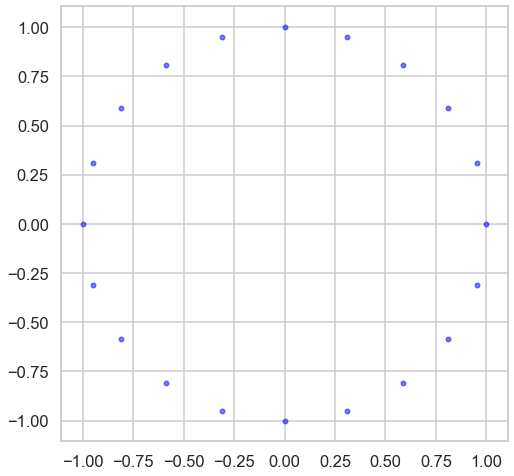

In [7]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

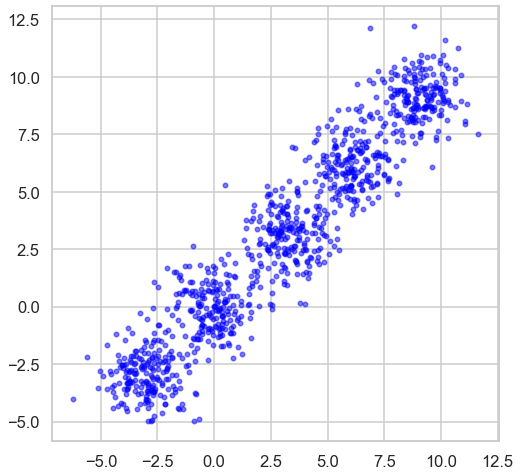

In [8]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

display_cluster(X)

#### 2.3. Example 3 : moons Data Gen and display 

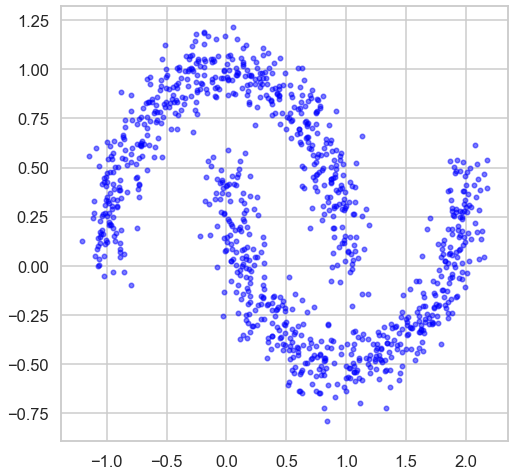

In [9]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

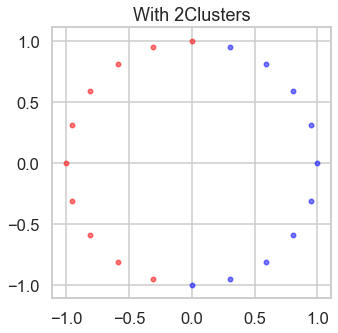

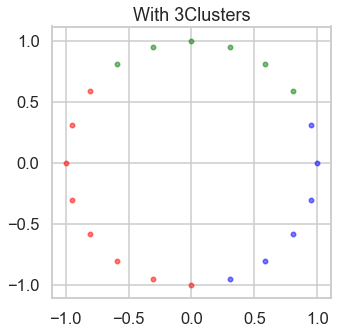

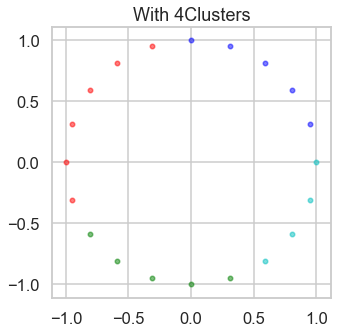

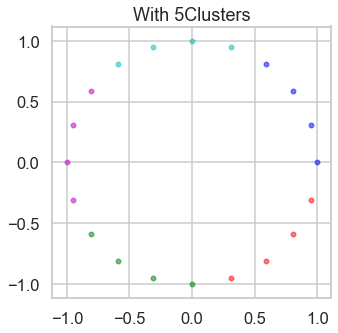

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


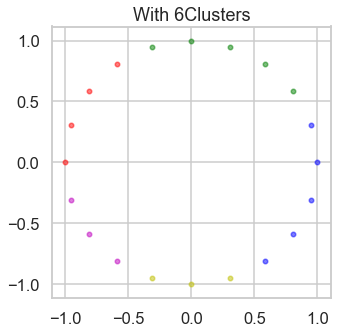

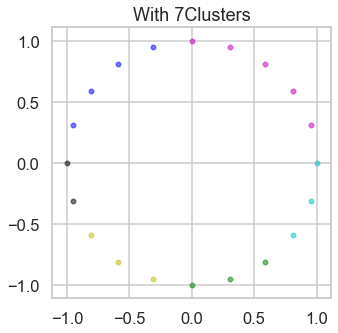

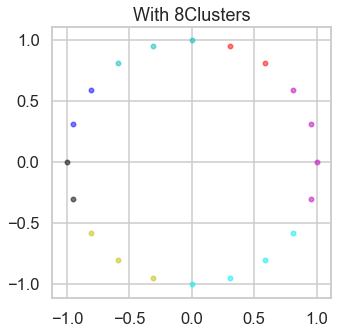

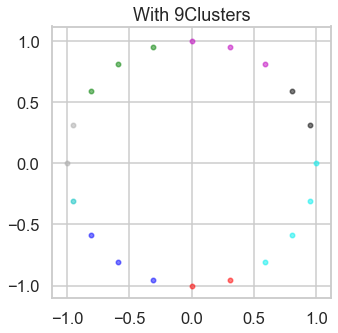

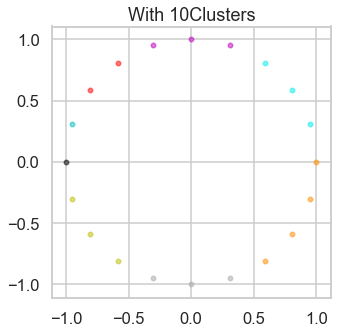

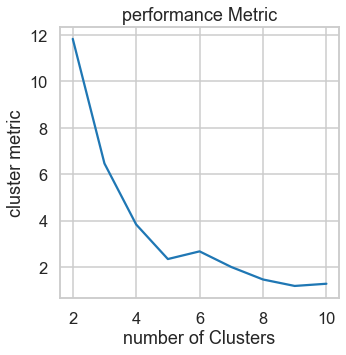

In [10]:
plt.rcParams['figure.figsize'] = [5,5]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()

Cluster_metricList=[]
for i in range(2,11):
    [ Cluster_Centroids,Final_Cluster_Distance , Cluster_Metric ] = GUC_Kmean(X,i,"E")
    display_cluster(X,Final_Cluster_Distance,i)
    s= "With "+str(i)+"Clusters"
    plt.title(s)
    plt.show()
    Cluster_metricList.append(Cluster_Metric)




plt.plot([2,3,4,5,6,7,8,9,10],Cluster_metricList)
plt.title('performance Metric')
plt.xlabel('number of Clusters')
plt.ylabel('cluster metric')
plt.show()

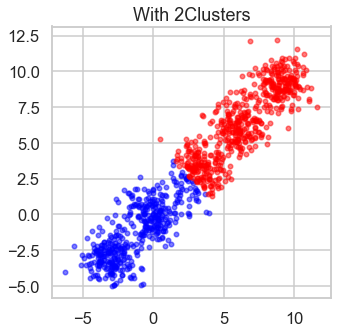

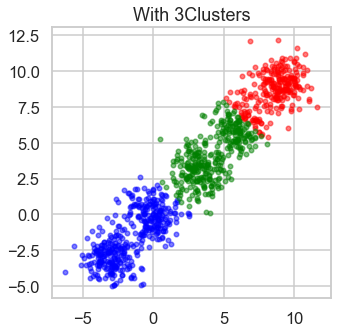

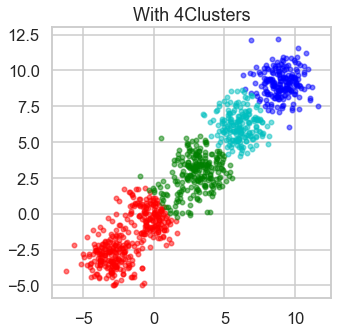

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


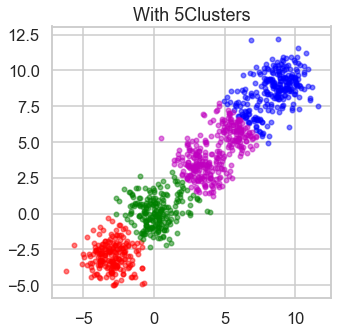

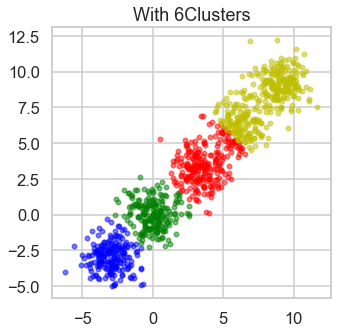

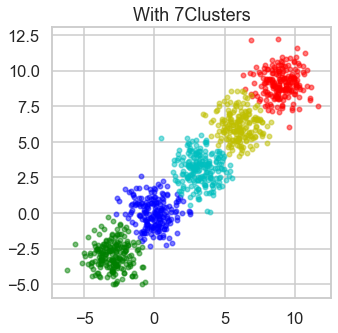

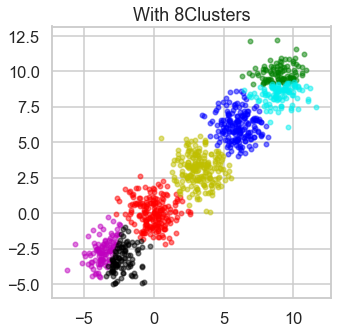

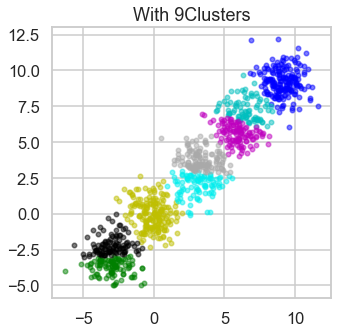

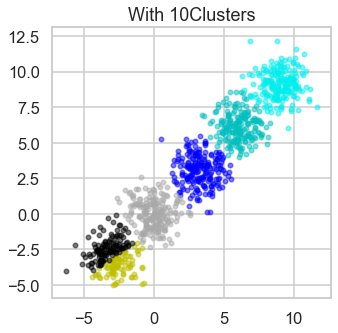

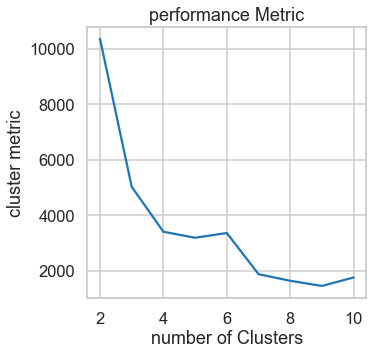

In [11]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

Cluster_metricList=[]
for i in range(2,11):
    [ Cluster_Centroids,Final_Cluster_Distance , Cluster_Metric ] = GUC_Kmean(X,i,"E")
    display_cluster(X,Final_Cluster_Distance,i)
    s= "With "+str(i)+"Clusters"
    plt.title(s)
    plt.show()
    Cluster_metricList.append(Cluster_Metric)




plt.plot([2,3,4,5,6,7,8,9,10],Cluster_metricList)
plt.title('performance Metric')
plt.xlabel('number of Clusters')
plt.ylabel('cluster metric')
plt.show()

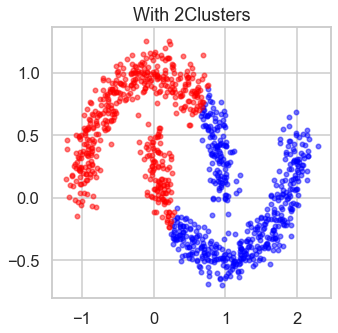

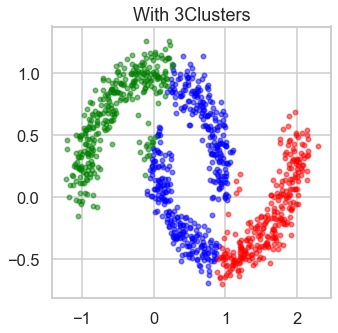

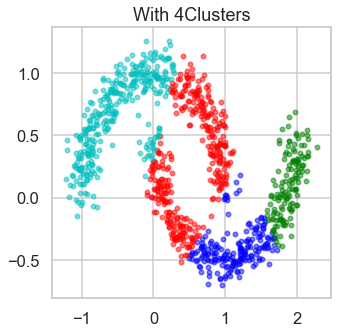

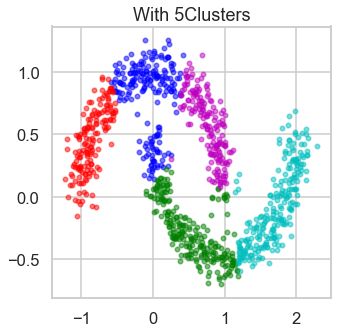

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in true_divide


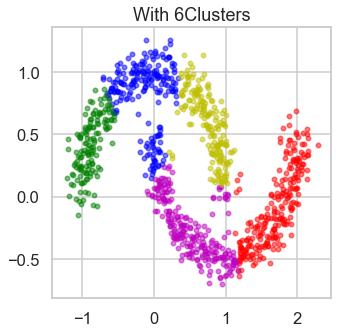

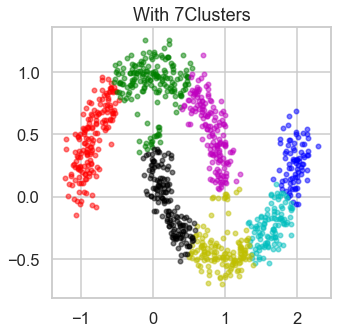

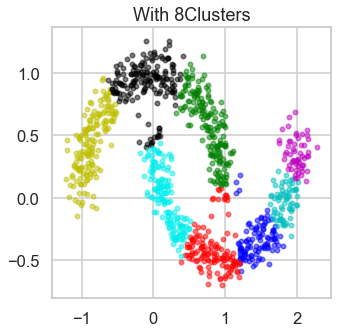

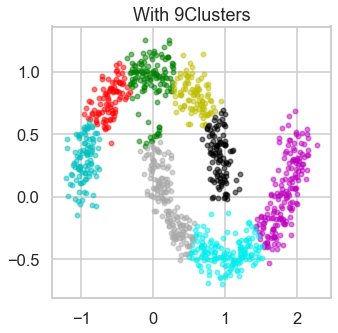

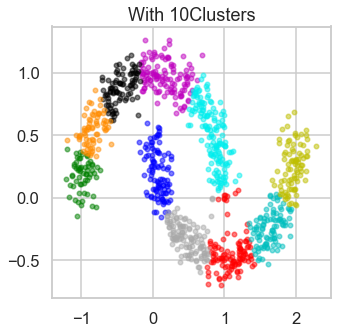

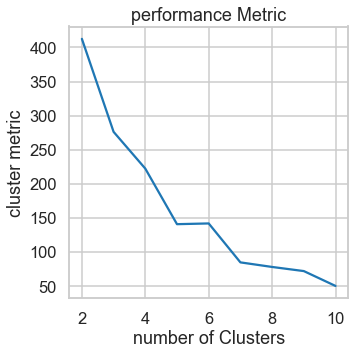

In [12]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)


Cluster_metricList=[]
for i in range(2,11):
    [ Cluster_Centroids,Final_Cluster_Distance , Cluster_Metric ] = GUC_Kmean(X,i,"E")
    display_cluster(X,Final_Cluster_Distance,i)
    s= "With "+str(i)+"Clusters"
    plt.title(s)
    plt.show()
    Cluster_metricList.append(Cluster_Metric)




plt.plot([2,3,4,5,6,7,8,9,10],Cluster_metricList)
plt.title('performance Metric')
plt.xlabel('number of Clusters')
plt.ylabel('cluster metric')
plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 